In [1]:
import os
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def build_and_show_wordcloud(text):
    wordcloud = WordCloud(background_color='white', height=500, width=1000).generate(text)
    plt.figure(figsize=(15, 30))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [2]:
import requests


def get_raw_html(url):
    return requests.get(url).content

In [3]:
from bs4 import BeautifulSoup

def extract_tag_a(parser):
    text = ''
    for link in parser.find_all('a'):
        title = link.get('title')
        if title:
            text += title + ' '
    return text

def extract_text_from_tag(parser, tag):
    text = ''    
    for list_item in parser.find_all(tag):
        content = list_item.text
        if content:
            text += content.strip() + ' '
    return text

def extract_text_from_html(html):
    sp = BeautifulSoup(html, features='lxml')
    
    text = ''
    text += extract_tag_a(sp) + ' '
    
    tags_with_text = ['li', 'ul', 'p', 'tc', 'h1', 'h2', 'h3', 'h4']
    for tag in tags_with_text:
        text += extract_text_from_tag(sp, tag) + ' '
    return text

In [4]:
def build_wordcloud_from_url(url):
    html = requests.get(url).content
    text = extract_text_from_html(html)
    build_and_show_wordcloud(text)

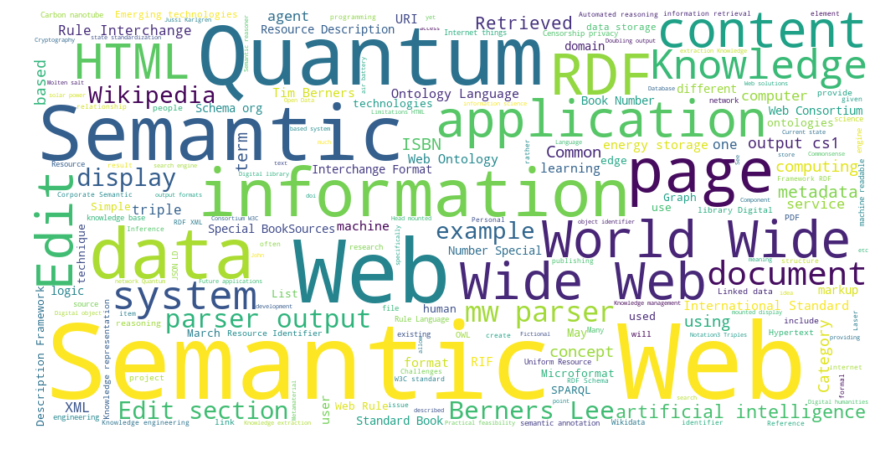

In [5]:
build_wordcloud_from_url('https://en.wikipedia.org/wiki/Semantic_Web')

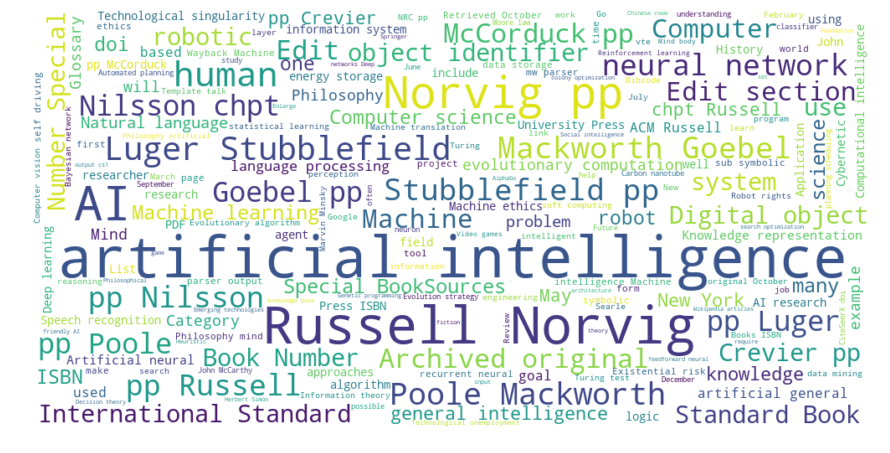

In [6]:
build_wordcloud_from_url('https://en.wikipedia.org/wiki/Artificial_intelligence')

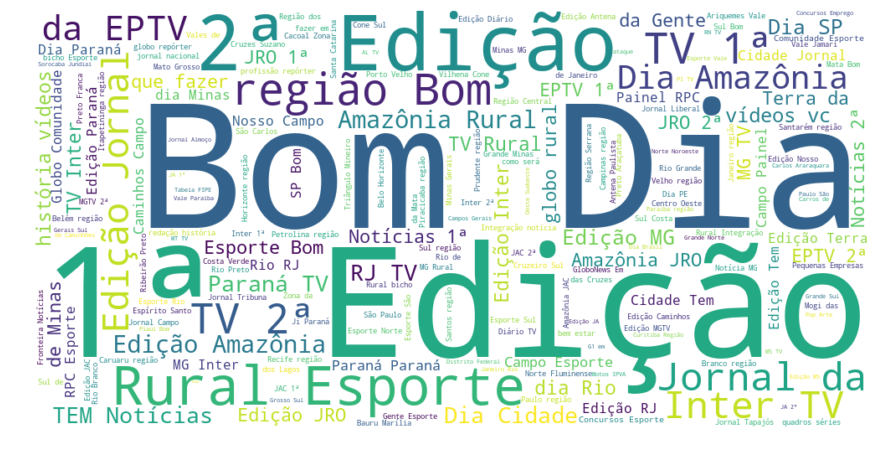

In [7]:
build_wordcloud_from_url('https://g1.globo.com/economia/tecnologia/blog/altieres-rohr/post/2019/03/26/tesla-model-3-e-navegadores-de-internet-sao-hackeados-em-competicao.ghtml')